<a href="https://colab.research.google.com/github/JorgeAccardi/auscultacion-presa/blob/main/An%C3%A1lisis_de_Inclin%C3%B3metros_(GKN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INCLINOMETROS

#Análisis de datos de archivos GKN

##Carga de datos, procesamiento y generación del DATAFRAME

In [1]:
import pandas as pd
import os

def procesar_gkn_inclinometros(file_path):
    try:
        print(f"Procesando el archivo: {file_path}")
        with open(file_path, 'r') as file:
            lines = file.readlines()
            fecha = next((line.split(":")[1].strip() for line in lines if line.startswith("DATE")), None)
            nro_sonda = next((line.split(":")[1].strip() for line in lines if line.startswith("PROBE NO.")), None)
            hole_no = next((line.split(":")[1].strip() for line in lines if line.startswith("HOLE NO.")), None)
            start_idx = next((i + 2 for i, line in enumerate(lines) if '#READINGS:' in line), None)
            if start_idx is None:
                raise ValueError(f"No se encontraron lecturas en el archivo {file_path}")
            data = [line.strip().split(',') for line in lines[start_idx:]]
            df = pd.DataFrame(data, columns=['Profundidad', 'A+', 'A-', 'B+', 'B-'])
            df = df.apply(pd.to_numeric, errors='coerce')
            df['Fecha'] = pd.to_datetime(fecha, dayfirst=True, errors='coerce').strftime('%d/%m/%Y')
            df['Inclinómetro'] = hole_no
            df['Nro. Sonda'] = nro_sonda
            df = df[['Fecha', 'Inclinómetro', 'Profundidad', 'A+', 'A-', 'B+', 'B-', 'Nro. Sonda']]
            print(f"Archivo procesado correctamente: {file_path}")
            return df
    except Exception as e:
        print(f"Error procesando el archivo {file_path}: {e}")
        return None

def procesar_varios_gkn(file_list):
    dfs = []
    for file_path in file_list:
        df = procesar_gkn_inclinometros(file_path)
        if df is not None:
            dfs.append(df)
    if dfs:
        df_final = pd.concat(dfs, ignore_index=True)
        print("Todos los archivos fueron procesados correctamente.")
        return df_final
    else:
        print("No se pudieron procesar los archivos.")
        return None

In [2]:
import os
from google.colab import files

def seleccionar_fuente_gkn():
    print("Selecciona la fuente de tus archivos GKN:")
    print("1 - Subir ZIP con todos los archivos desde tu computadora")
    print("2 - Carpeta en Google Drive")
    print("3 - Carpeta en /content de Colab")
    print("4 - Seleccionar carpeta localmente (visual, solo en Colab)")
    fuente = input("Escribe 1, 2, 3 o 4 y presiona ENTER: ")
    return fuente.strip()

file_names = []
fuente = seleccionar_fuente_gkn()

if fuente == "1":
    print("Sube el archivo .zip que contiene todos los archivos GKN:")
    uploaded = files.upload()
    import zipfile
    for filename in uploaded.keys():
        if filename.endswith('.zip'):
            with zipfile.ZipFile(filename, 'r') as zip_ref:
                zip_ref.extractall('GKN_folder')
            print("ZIP descomprimido en /content/GKN_folder")
        else:
            print("El archivo subido no es un .zip")
    carpeta_gkn = '/content/GKN_folder'
    file_names = [os.path.join(carpeta_gkn, f) for f in os.listdir(carpeta_gkn) if f.lower().endswith('.gkn')]
    print("Archivos GKN encontrados:", file_names)

elif fuente == "2":
    from google.colab import drive
    drive.mount('/content/drive')
    carpeta_gkn = input("Pega la ruta completa de la carpeta en Google Drive (ej: /content/drive/MyDrive/MisGKN): ").strip()
    if not os.path.exists(carpeta_gkn):
        raise ValueError("La carpeta especificada no existe.")
    file_names = [os.path.join(carpeta_gkn, f) for f in os.listdir(carpeta_gkn) if f.lower().endswith('.gkn')]
    print("Archivos GKN encontrados:", file_names)

elif fuente == "3":
    carpeta_gkn = input("Pega la ruta de la carpeta en /content (ej: /content/GKN): ").strip()
    if not os.path.exists(carpeta_gkn):
        raise ValueError("La carpeta especificada no existe.")
    file_names = [os.path.join(carpeta_gkn, f) for f in os.listdir(carpeta_gkn) if f.lower().endswith('.gkn')]
    print("Archivos GKN encontrados:", file_names)

elif fuente == "4":
    try:
        from google.colab import widgets
        import shutil
        print("Selecciona la carpeta con los archivos GKN en tu computadora.")
        # Usar el selector visual
        folder_uploaded = files.upload()
        local_folder = '/content/selected_folder'
        os.makedirs(local_folder, exist_ok=True)
        # Mueve los archivos subidos a una carpeta
        for filename in folder_uploaded.keys():
            shutil.move(filename, os.path.join(local_folder, filename))
        file_names = [os.path.join(local_folder, f) for f in os.listdir(local_folder) if f.lower().endswith('.gkn')]
        print("Archivos GKN encontrados:", file_names)
    except Exception as e:
        print("Funcionalidad visual de carpeta local no disponible. Usa ZIP o Drive para carpetas masivas.")
        file_names = []

else:
    print("Opción no válida. Ejecuta la celda de nuevo y elige 1, 2, 3 o 4.")

# Procesar todos los archivos encontrados (si hay)
if file_names:
    df_gkn = procesar_varios_gkn(file_names)
    if df_gkn is not None:
        display(df_gkn.head())
else:
    print("No se encontraron archivos para procesar.")

Selecciona la fuente de tus archivos GKN:
1 - Subir ZIP con todos los archivos desde tu computadora
2 - Carpeta en Google Drive
3 - Carpeta en /content de Colab
4 - Seleccionar carpeta localmente (visual, solo en Colab)
Escribe 1, 2, 3 o 4 y presiona ENTER: 1
Sube el archivo .zip que contiene todos los archivos GKN:


Saving MD-IN4-D1.zip to MD-IN4-D1.zip
ZIP descomprimido en /content/GKN_folder
Archivos GKN encontrados: ['/content/GKN_folder/MD-IN4-D1_012.gkn', '/content/GKN_folder/MD-IN4-D1_062.gkn', '/content/GKN_folder/MD-IN4-D1_025.gkn', '/content/GKN_folder/MD-IN4-D1_002.gkn', '/content/GKN_folder/MD-IN4-D1_009.gkn', '/content/GKN_folder/MD-IN4-D1_094.gkn', '/content/GKN_folder/MD-IN4-D1_061.gkn', '/content/GKN_folder/MD-IN4-D1_101.gkn', '/content/GKN_folder/MD-IN4-D1_036.gkn', '/content/GKN_folder/MD-IN4-D1_065.gkn', '/content/GKN_folder/MD-IN4-D1_057.gkn', '/content/GKN_folder/MD-IN4-D1_018.gkn', '/content/GKN_folder/MD-IN4-D1_091.gkn', '/content/GKN_folder/MD-IN4-D1_015.gkn', '/content/GKN_folder/MD-IN4-D1_074.gkn', '/content/GKN_folder/MD-IN4-D1_023.gkn', '/content/GKN_folder/MD-IN4-D1_066.gkn', '/content/GKN_folder/MD-IN4-D1_042.gkn', '/content/GKN_folder/MD-IN4-D1_116.gkn', '/content/GKN_folder/MD-IN4-D1_112.gkn', '/content/GKN_folder/MD-IN4-D1_090.gkn', '/content/GKN_folder/MD-IN4-D1_08

,Fecha,Inclinómetro,Profundidad,A+,A-,B+,B-,Nro. Sonda
0,09/12/2020,MD-IN4-D1,87.0,269.0,-272.0,160.0,-141.0,Probe-93
1,09/12/2020,MD-IN4-D1,86.5,277.0,-281.0,117.0,-80.0,Probe-93
2,09/12/2020,MD-IN4-D1,86.0,256.0,-263.0,43.0,-6.0,Probe-93
3,09/12/2020,MD-IN4-D1,85.5,202.0,-206.0,-13.0,50.0,Probe-93
4,09/12/2020,MD-IN4-D1,85.0,182.0,-188.0,-89.0,124.0,Probe-93


In [3]:
df_gkn

,Fecha,Inclinómetro,Profundidad,A+,A-,B+,B-,Nro. Sonda
0,09/12/2020,MD-IN4-D1,87.0,269.0,-272.0,160.0,-141.0,Probe-93
1,09/12/2020,MD-IN4-D1,86.5,277.0,-281.0,117.0,-80.0,Probe-93
2,09/12/2020,MD-IN4-D1,86.0,256.0,-263.0,43.0,-6.0,Probe-93
3,09/12/2020,MD-IN4-D1,85.5,202.0,-206.0,-13.0,50.0,Probe-93
4,09/12/2020,MD-IN4-D1,85.0,182.0,-188.0,-89.0,124.0,Probe-93
...,...,...,...,...,...,...,...,...
20876,02/09/2023,MD-IN4-D1,2.5,212.0,-222.0,-34.0,65.0,PROB 74
20877,02/09/2023,MD-IN4-D1,2.0,138.0,-145.0,75.0,-47.0,PROB 74
20878,02/09/2023,MD-IN4-D1,1.5,75.0,-84.0,186.0,-154.0,PROB 74
20879,02/09/2023,MD-IN4-D1,1.0,182.0,-193.0,259.0,-229.0,PROB 74


###Limpieza y Validación de Datos
###Objetivo: Dejar el DataFrame listo para el cálculo de desplazamientos, asegurando calidad y coherencia en los datos.




1. Chequeo de tipos y valores nulos
Asegúrate de que las columnas numéricas sean float y revisa si hay valores nulos o atípicos.

In [5]:
# Suponiendo que tienes tu DataFrame consolidado en df_gkn

cols_numericas = ['Profundidad', 'A+', 'A-', 'B+', 'B-']
df_gkn[cols_numericas] = df_gkn[cols_numericas].apply(pd.to_numeric, errors='coerce')

# Verificar valores nulos
print(df_gkn.isnull().sum())

# Opcional: eliminar filas con nulos o imputar según reglas de negocio
df_gkn = df_gkn.dropna(subset=cols_numericas)

Fecha           0
Inclinómetro    0
Profundidad     0
A+              0
A-              0
B+              0
B-              0
Nro. Sonda      0
dtype: int64


<ipython-input-5-300f32a3c6fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gkn[cols_numericas] = df_gkn[cols_numericas].apply(pd.to_numeric, errors='coerce')


2. Chequeo de duplicados

In [6]:
# Duplicados exactos (por todos los campos)
print("Duplicados exactos:", df_gkn.duplicated().sum())

# Duplicados por clave (Fecha, Inclinómetro, Profundidad)
print("Duplicados por clave:", df_gkn.duplicated(subset=['Fecha', 'Inclinómetro', 'Profundidad']).sum())

# Eliminar duplicados por clave, si corresponde
df_gkn = df_gkn.drop_duplicates(subset=['Fecha', 'Inclinómetro', 'Profundidad'])

Duplicados exactos: 0
Duplicados por clave: 0


3. Chequeo de valores atípicos
Por ejemplo, valores fuera de rango físico para lecturas (consultar el rango esperado de tu instrumento).

In [11]:
import numpy as np

# Rango típico de lecturas para inclinómetro Geokon suele ser +/- 20,000 (revisar tu manual)
for col in ['A+', 'A-', 'B+', 'B-']:
    outliers = df_gkn[(df_gkn[col] < -20000) | (df_gkn[col] > 20000)]
    print(f"Outliers en {col}: {len(outliers)}")
    # Opcional: Eliminar o marcar como NaN
    df_gkn.loc[(df_gkn[col] < -20000) | (df_gkn[col] > 20000), col] = np.nan

# Vuelve a limpiar nulos si eliminaste por outliers
df_gkn = df_gkn.dropna(subset=cols_numericas)

Outliers en A+: 0
Outliers en A-: 0
Outliers en B+: 0
Outliers en B-: 0


4. Conversión y ordenamiento
Fechas en formato datetime, columnas con nombres claros y datos ordenados.

In [8]:
df_gkn['Fecha'] = pd.to_datetime(df_gkn['Fecha'], dayfirst=True, errors='coerce')
df_gkn = df_gkn.sort_values(['Inclinómetro', 'Fecha', 'Profundidad'])

# Guardar respaldo del DataFrame limpio

In [12]:
# Guarda un respaldo en formato CSV
df_gkn.to_csv('gkn_limpio_respaldo.csv', index=False)
print("Respaldo guardado como 'gkn_limpio_respaldo.csv'")

Respaldo guardado como 'gkn_limpio_respaldo.csv'


2. Cálculo de desplazamientos horizontales

a) Cálculo de valores A y B Fórmulas estándar: A = (A+ - A-) / 2 B = (B+ - B-) / 2

In [13]:
df_gkn['A'] = (df_gkn['A+'] - df_gkn['A-']) / 2
df_gkn['B'] = (df_gkn['B+'] - df_gkn['B-']) / 2

b) Conversión de A y B a ángulos (radianes)
Según el manual Geokon:
theta_A = A * π / 180,000
theta_B = B * π / 180,000

In [14]:
import numpy as np
df_gkn['theta_A'] = df_gkn['A'] * np.pi / 180_000
df_gkn['theta_B'] = df_gkn['B'] * np.pi / 180_000

c) Cálculo de L (longitud de tramo entre lecturas)
Para cada pozo y campaña, L es la diferencia entre profundidades consecutivas (ordenadas de arriba hacia abajo).

In [15]:
df_gkn = df_gkn.sort_values(['Inclinómetro', 'Fecha', 'Profundidad'], ascending=[True, True, False])
df_gkn['L'] = df_gkn.groupby(['Inclinómetro', 'Fecha'])['Profundidad'].diff(-1).abs()
# Rellena los NaN (última profundidad) con el valor anterior, si lo deseas:
df_gkn['L'] = df_gkn.groupby(['Inclinómetro', 'Fecha'])['L'].ffill()

d) Desplazamientos incrementales
Inc_A = L * sin(theta_A)
Inc_B = L * sin(theta_B)

In [16]:
df_gkn['Inc_A'] = df_gkn['L'] * np.sin(df_gkn['theta_A'])
df_gkn['Inc_B'] = df_gkn['L'] * np.sin(df_gkn['theta_B'])

e) Desplazamientos acumulados
Cum_A y Cum_B: suma acumulada de los incrementos desde la parte superior hacia abajo, por pozo y campaña.

In [17]:
df_gkn['Cum_A'] = df_gkn.groupby(['Inclinómetro', 'Fecha'])['Inc_A'].cumsum()
df_gkn['Cum_B'] = df_gkn.groupby(['Inclinómetro', 'Fecha'])['Inc_B'].cumsum()

f) Rotación de ejes (si corresponde)
Si tu pozo está rotado respecto a la referencia, puedes aplicar una rotación.
Por ejemplo, para un ángulo α (en grados):

In [18]:
alpha_deg = 7  # Cambia este valor si tu pozo tiene otro ángulo de referencia
alpha_rad = np.deg2rad(alpha_deg)
df_gkn['Rot_A'] = df_gkn['Cum_A'] * np.cos(alpha_rad) + df_gkn['Cum_B'] * np.sin(alpha_rad)
df_gkn['Rot_B'] = -df_gkn['Cum_A'] * np.sin(alpha_rad) + df_gkn['Cum_B'] * np.cos(alpha_rad)

#Script Completo

In [20]:
import pandas as pd
import numpy as np

# --- Paso 1: RESPALDO DEL DATAFRAME LIMPIO ---
df_gkn.to_csv('gkn_limpio_respaldo.csv', index=False)
print("Respaldo guardado como 'gkn_limpio_respaldo.csv'")

# --- Paso 2: DEFINICIÓN DE ALPHA ---
# Define el valor de alpha (en grados) para el inclinómetro que estás analizando
alpha_deg = 36  # Cambia este valor según el inclinómetro actual
alpha_rad = np.deg2rad(alpha_deg)

# --- Paso 3: CÁLCULO DE DESPLAZAMIENTOS ---
# A y B
df_gkn['A'] = (df_gkn['A+'] - df_gkn['A-']) / 2
df_gkn['B'] = (df_gkn['B+'] - df_gkn['B-']) / 2

# Ángulos en radianes
df_gkn['theta_A'] = df_gkn['A'] * np.pi / 180_000
df_gkn['theta_B'] = df_gkn['B'] * np.pi / 180_000

# Ordenar para cálculo incremental
df_gkn = df_gkn.sort_values(['Fecha', 'Profundidad'], ascending=[True, False])

# Longitud de tramo L
df_gkn['L'] = df_gkn.groupby(['Fecha'])['Profundidad'].diff(-1).abs()
df_gkn['L'] = df_gkn.groupby(['Fecha'])['L'].ffill()

# Incrementos
df_gkn['Inc_A'] = df_gkn['L'] * np.sin(df_gkn['theta_A'])
df_gkn['Inc_B'] = df_gkn['L'] * np.sin(df_gkn['theta_B'])

# Acumulados
df_gkn['Cum_A'] = df_gkn.groupby(['Fecha'])['Inc_A'].cumsum()
df_gkn['Cum_B'] = df_gkn.groupby(['Fecha'])['Inc_B'].cumsum()

# --- Paso 4: ROTACIÓN POR ALPHA ---
df_gkn['Rot_A'] = df_gkn['Cum_A'] * np.cos(alpha_rad) + df_gkn['Cum_B'] * np.sin(alpha_rad)
df_gkn['Rot_B'] = -df_gkn['Cum_A'] * np.sin(alpha_rad) + df_gkn['Cum_B'] * np.cos(alpha_rad)

# --- Paso 5: EXPORTACIÓN DEL RESULTADO ---
df_gkn.to_csv('gkn_desplazamientos.csv', index=False)
print("Resultados exportados como 'gkn_desplazamientos.csv'")

# --- (Opcional) Resumen por campaña ---
resumen = df_gkn.groupby(['Fecha']).agg({
    'Rot_A': ['min', 'max'],
    'Rot_B': ['min', 'max']
})
print(resumen)

Respaldo guardado como 'gkn_limpio_respaldo.csv'
Resultados exportados como 'gkn_desplazamientos.csv'
               Rot_A               Rot_B          
                 min       max       min       max
Fecha                                             
2020-09-21  0.002693  0.322911 -0.347582 -0.000295
2020-09-24  0.002695  0.323783 -0.348137 -0.000307
2020-09-28  0.002681  0.322826 -0.346664 -0.000281
2020-10-09  0.002685  0.324489 -0.349160 -0.000328
2020-10-12  0.002687  0.322920 -0.347365 -0.000318
...              ...       ...       ...       ...
2023-11-02  0.002678  0.329732 -0.344911 -0.000301
2023-11-06  0.002654  0.328936 -0.345721 -0.000348
2023-11-10  0.002652  0.327715 -0.345110 -0.000314
2023-11-15  0.002674  0.329462 -0.346018 -0.000336
2023-11-22  0.002679  0.329718 -0.344995 -0.000307

[120 rows x 4 columns]


In [25]:
resumen

Rot_A               Rot_B          
                 min       max       min       max
Fecha                                             
2020-09-21  0.002693  0.322911 -0.347582 -0.000295
2020-09-24  0.002695  0.323783 -0.348137 -0.000307
2020-09-28  0.002681  0.322826 -0.346664 -0.000281
2020-10-09  0.002685  0.324489 -0.349160 -0.000328
2020-10-12  0.002687  0.322920 -0.347365 -0.000318
...              ...       ...       ...       ...
2023-11-02  0.002678  0.329732 -0.344911 -0.000301
2023-11-06  0.002654  0.328936 -0.345721 -0.000348
2023-11-10  0.002652  0.327715 -0.345110 -0.000314
2023-11-15  0.002674  0.329462 -0.346018 -0.000336
2023-11-22  0.002679  0.329718 -0.344995 -0.000307

[120 rows x 4 columns]

a) Curva de desplazamiento acumulado vs. profundidad por campaña
Esto te permite ver el perfil de desplazamiento horizontal (por ejemplo, Rot_A) para cada fecha de medición.

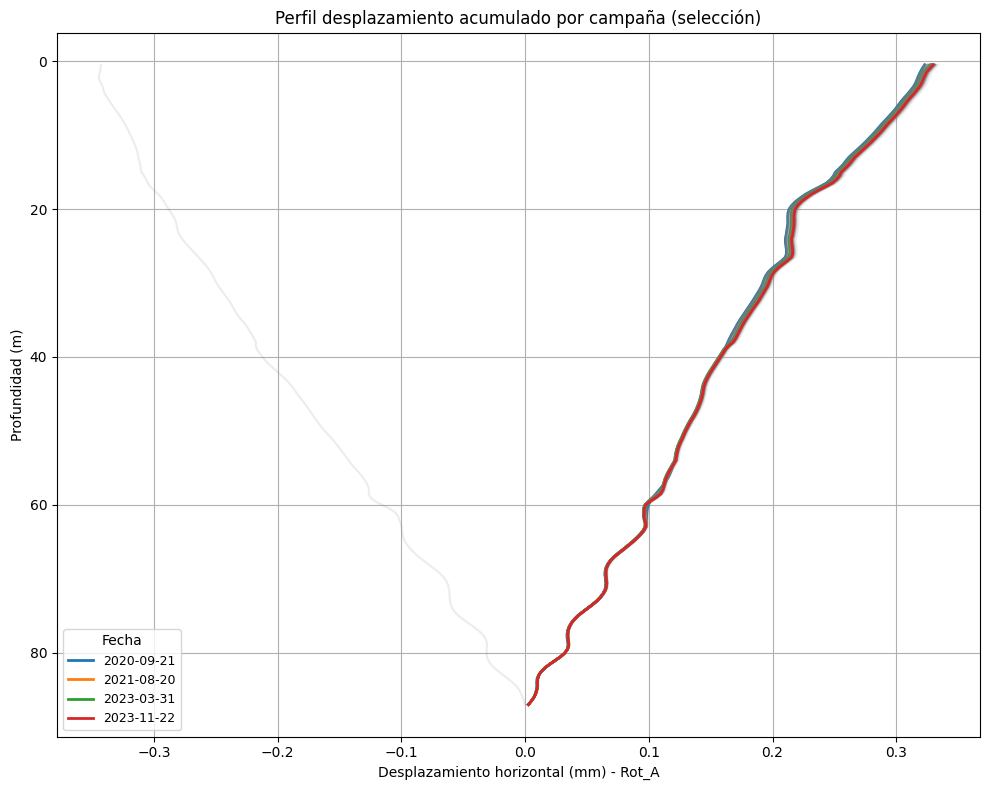

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))
fechas = sorted(df_gkn['Fecha'].unique())
# Selecciona campañas clave (puedes ajustar este criterio)
n = len(fechas)
campañas_destacadas = [fechas[0], fechas[n//3], fechas[2*n//3], fechas[-1]]  # inicial, dos intermedias y final

for fecha, df_campaña in df_gkn.groupby('Fecha'):
    if fecha in campañas_destacadas:
        plt.plot(df_campaña['Rot_A'], df_campaña['Profundidad'], label=str(fecha)[:10], linewidth=2)
    else:
        plt.plot(df_campaña['Rot_A'], df_campaña['Profundidad'], color='gray', alpha=0.15)

plt.gca().invert_yaxis()
plt.xlabel('Desplazamiento horizontal (mm) - Rot_A')
plt.ylabel('Profundidad (m)')
plt.title('Perfil desplazamiento acumulado por campaña (selección)')
plt.legend(title="Fecha", fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

b) Evolución temporal del desplazamiento máximo
Para ver cómo evoluciona el desplazamiento máximo a lo largo del tiempo.

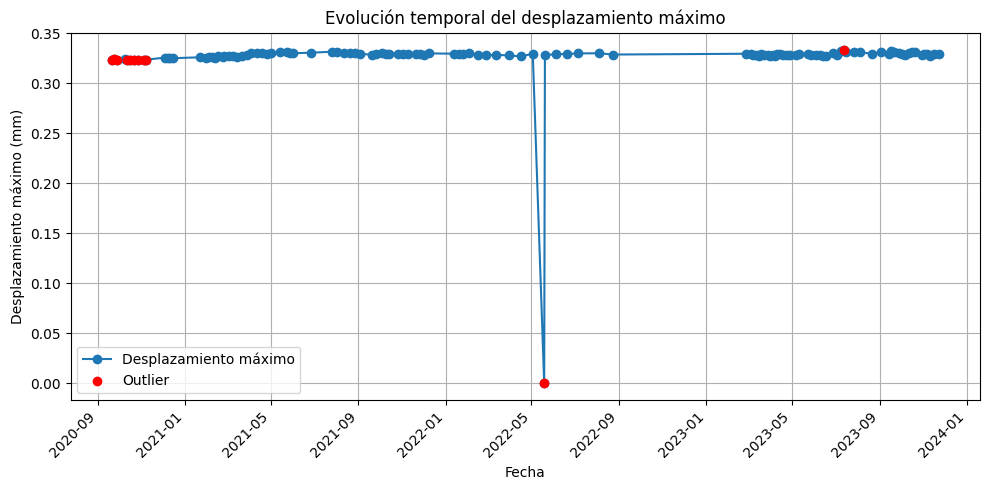

In [28]:
maximos = df_gkn.groupby('Fecha')['Rot_A'].max()
plt.figure(figsize=(10,5))
plt.plot(maximos.index, maximos.values, marker='o', linestyle='-', color='tab:blue', label='Desplazamiento máximo')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Desplazamiento máximo (mm)')
plt.xlabel('Fecha')
plt.title('Evolución temporal del desplazamiento máximo')
plt.grid(True)
plt.tight_layout()
plt.legend()

# Opcional: resaltar posibles outliers
q1, q3 = np.percentile(maximos, [25, 75])
iqr = q3 - q1
outlier_mask = (maximos < q1 - 1.5*iqr) | (maximos > q3 + 1.5*iqr)
if outlier_mask.any():
    plt.scatter(maximos.index[outlier_mask], maximos.values[outlier_mask], color='red', zorder=5, label='Outlier')
    plt.legend()

plt.show()

c) Heatmap (profundidad vs. tiempo)
Para ver todo el “mapa” de desplazamientos en el tiempo.

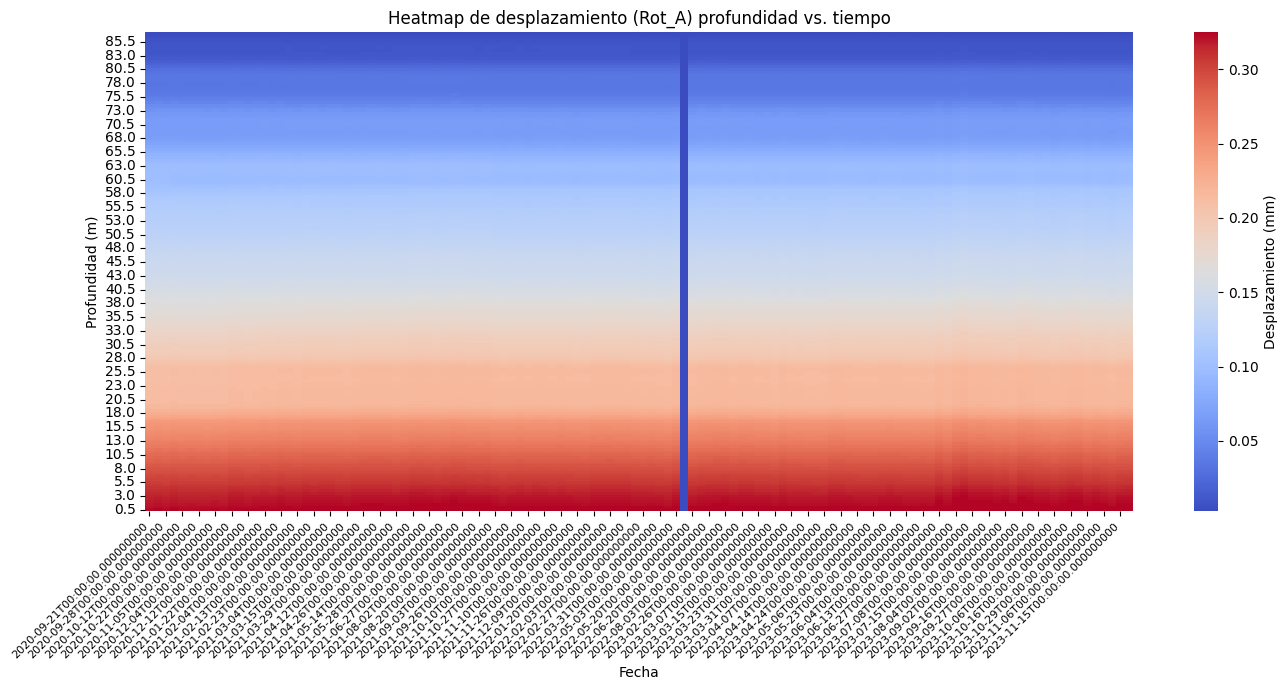

In [29]:
import seaborn as sns

pivot = df_gkn.pivot_table(index='Profundidad', columns='Fecha', values='Rot_A')
vmax = np.percentile(pivot.values[~np.isnan(pivot.values)], 99)
vmin = np.percentile(pivot.values[~np.isnan(pivot.values)], 1)

plt.figure(figsize=(14, 7))
sns.heatmap(pivot, cmap='coolwarm', cbar_kws={'label': 'Desplazamiento (mm)'}, vmax=vmax, vmin=vmin)
plt.gca().invert_yaxis()
plt.title('Heatmap de desplazamiento (Rot_A) profundidad vs. tiempo')
plt.xlabel('Fecha')
plt.ylabel('Profundidad (m)')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

d) Exportar a Excel para compartir

In [24]:
df_gkn.to_excel('gkn_desplazamientos_resultados.xlsx', index=False)

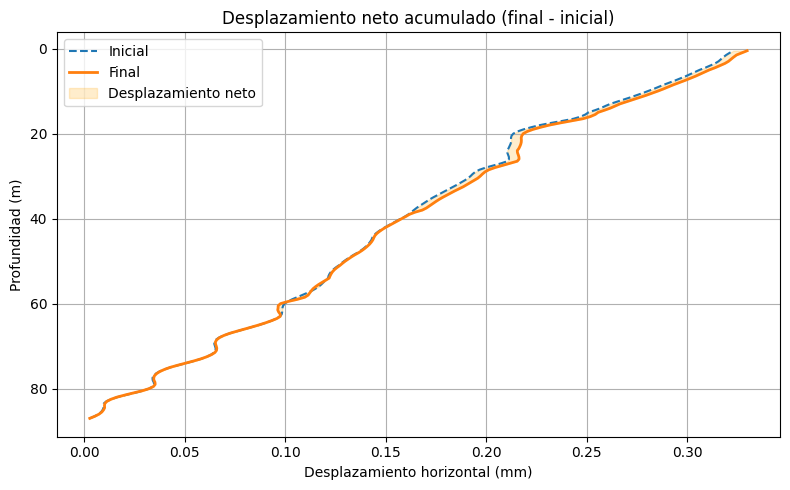

ValueError: x and y must have same first dimension, but have shapes (348,) and (174,)

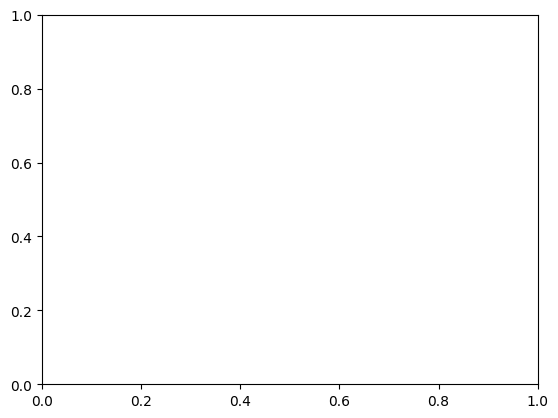

In [30]:
# Desplazamiento neto entre última y primera campaña
campaña_inicial = df_gkn[df_gkn['Fecha'] == df_gkn['Fecha'].min()]
campaña_final = df_gkn[df_gkn['Fecha'] == df_gkn['Fecha'].max()]

plt.figure(figsize=(8,5))
plt.plot(campaña_inicial['Rot_A'], campaña_inicial['Profundidad'], label='Inicial', linestyle='--')
plt.plot(campaña_final['Rot_A'], campaña_final['Profundidad'], label='Final', linewidth=2)
plt.fill_betweenx(campaña_final['Profundidad'],
                  campaña_inicial['Rot_A'], campaña_final['Rot_A'], color='orange', alpha=0.2,
                  label='Desplazamiento neto')
plt.gca().invert_yaxis()
plt.xlabel('Desplazamiento horizontal (mm)')
plt.ylabel('Profundidad (m)')
plt.title('Desplazamiento neto acumulado (final - inicial)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Desplazamiento incremental entre campañas consecutivas
for (f1, f2) in zip(fechas[:-1], fechas[1:]):
    df1 = df_gkn[df_gkn['Fecha'] == f1]
    df2 = df_gkn[df_gkn['Fecha'] == f2]
    plt.plot(df2['Rot_A']-df1['Rot_A'], df2['Profundidad'], label=f'{str(f1)[:10]}→{str(f2)[:10]}', alpha=0.5)
plt.gca().invert_yaxis()
plt.xlabel('Desplazamiento incremental (mm)')
plt.ylabel('Profundidad (m)')
plt.title('Incrementos de desplazamiento entre campañas')
plt.legend(fontsize=7)
plt.tight_layout()
plt.show()

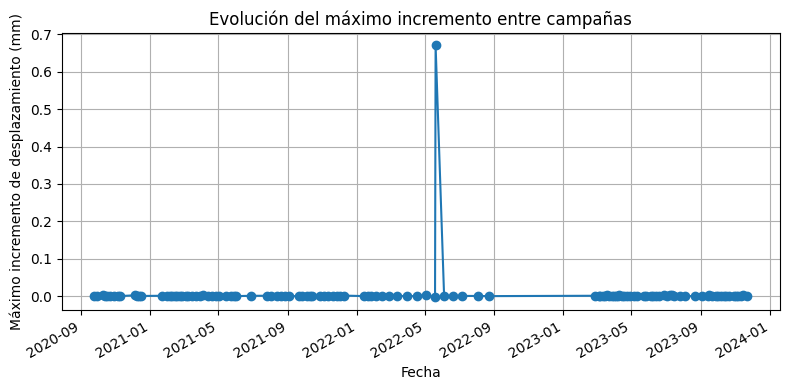

In [31]:
# Variación máxima de desplazamiento entre campañas consecutivas
max_disp = df_gkn.pivot_table(index='Fecha', columns='Profundidad', values='Rot_A')
delta_max = max_disp.diff().max(axis=1)  # Máximo cambio entre campañas por campaña

plt.figure(figsize=(8,4))
delta_max.plot(marker='o')
plt.ylabel('Máximo incremento de desplazamiento (mm)')
plt.xlabel('Fecha')
plt.title('Evolución del máximo incremento entre campañas')
plt.grid(True)
plt.tight_layout()
plt.show()

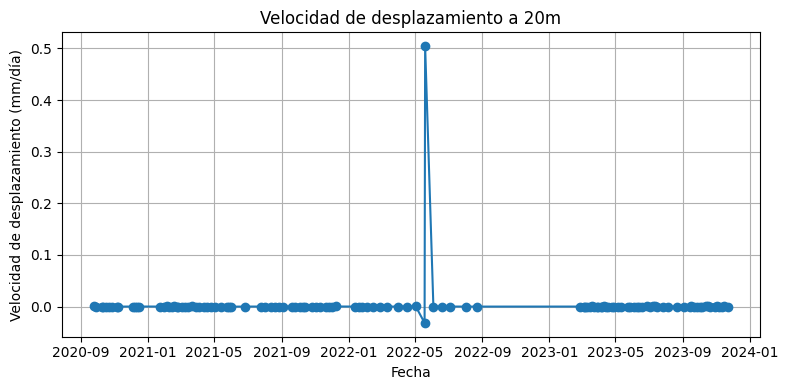

In [33]:
# En una profundidad de interés (ejemplo: 20m)
prof_ref = 20
df_cerca = df_gkn.loc[(df_gkn['Profundidad'] - prof_ref).abs() < 0.25]
df_cerca = df_cerca.sort_values('Fecha')

df_cerca['delta_t'] = df_cerca['Fecha'].diff().dt.days
df_cerca['delta_disp'] = df_cerca['Rot_A'].diff()
df_cerca['velocidad'] = df_cerca['delta_disp'] / df_cerca['delta_t']

plt.figure(figsize=(8,4))
plt.plot(df_cerca['Fecha'], df_cerca['velocidad'], marker='o')
plt.ylabel('Velocidad de desplazamiento (mm/día)')
plt.xlabel('Fecha')
plt.title(f'Velocidad de desplazamiento a {prof_ref}m')
plt.grid(True)
plt.tight_layout()
plt.show()